# Multilayer Perceptron for image recognition

### Description
Downloads/processes data and trains a neural network to identify handwritten digits from NIST

### Authors
Nicholas Brawand - nicholasbrawand@gmail.com

### Network Features

Import packages

In [1]:
import matplotlib.pyplot as plt
import tools
import os
import test
import mlp
import numpy as np
import sys
%matplotlib inline

Download data from NIST.

In [2]:

dataUrlList = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

# download data
print("Downloading data")
outFils = []
for l in dataUrlList:
    if not os.path.isfile(os.path.basename(l)):
        outFils.append(tools.DownloadData(l))
    else:
        print(os.path.basename(l), 'already exists')
        outFils.append(tools.DownloadData(l))

# unzip data
imgFils = []
for l in outFils:
    newFil = l.replace('.gz', '')

    if not os.path.isfile(newFil):
        tools.UnzipFil(l, newFil)
    else:
        print(newFil, 'already exists')

    imgFils.append(newFil)

# imgFils are in the following order:
#
# imgFils = 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte',
#           't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte'

y_train = tools.load_mnist_labels(imgFils[1])
X_train = tools.load_mnist_images(imgFils[0], len(y_train))

y_test = tools.load_mnist_labels(imgFils[3])
X_test = tools.load_mnist_images(imgFils[2], len(y_test))

train-images-idx3-ubyte.gz already exists
train-labels-idx1-ubyte.gz already exists
t10k-images-idx3-ubyte.gz already exists
t10k-labels-idx1-ubyte.gz already exists
train-images-idx3-ubyte already exists
train-labels-idx1-ubyte already exists
t10k-images-idx3-ubyte already exists
t10k-labels-idx1-ubyte already exists


Here is a sample of the first 10 numbers from our data with unique labels (0-9)

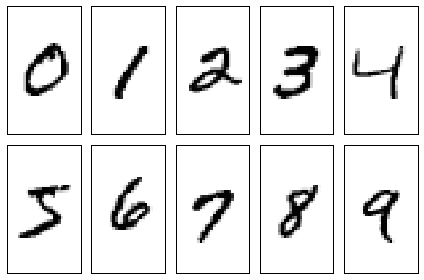

In [3]:
# plot first few images to test import
test.CreateSamplePlot(X_train, y_train)
# test.PlotSingleKind(X_train, y_train, 25, 4)
# test.PlotSingleKind(X_train, y_train, 25, 7)

Here we train our network.

In [4]:
network = mlp.NeuralNetMLP(n_output=10,
                       n_features=X_train.shape[1],
                       n_hidden=50,
                       l2=0.1,
                       l1=0.0,
                       epochs=50,
                       eta=0.001,
                       alpha=0.001,
                       decrease_const=0.00001,
                       minibatches=50,
                       shuffle=True,
                       random_state=1)

nn = network.fit(X_train, y_train, print_progress=True)


Epoch: 50/50

Here we plot the sum square of the errors as a function of epoch

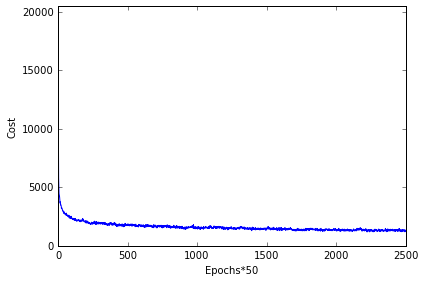

In [9]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, max(nn.cost_)])
plt.ylabel('Cost')
plt.xlabel('Epochs*50')
plt.tight_layout()
plt.show()
#plt.savefig('../figures/cost.png', dpi=300)

Here we test the accuracy of our model on the training data.

In [10]:
y_train_pred = nn.predict(X_train)

acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 90.61%


Now on the test data.

In [11]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 90.97%


Plot the a few misclassified images.

misclassified digits (T-true label, P-predicted label)


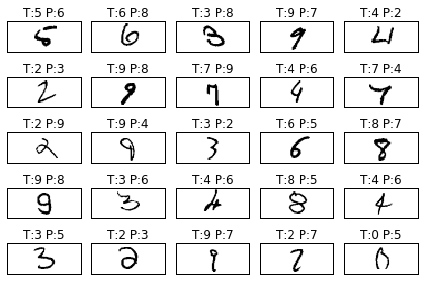

In [28]:
print("misclassified digits (T-true label, P-predicted label)")
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()

for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('T:{} P:{}'.format(correct_lab[i],miscl_lab[i]))


ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.savefig('../figures/mnist_miscl.png', dpi=300)
plt.show()